# Laboratorio no. 2 - Detección de SPAM
Christopher Garcia 20541 <br>
Marco Jurado 20308

In [51]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_curve, roc_auc_score, classification_report, accuracy_score, f1_score
import matplotlib.pyplot as plt
import nltk
import seaborn as sns

Descargar recursos de NLTK

In [52]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\marco\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\marco\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\marco\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Una vez tenemos nuestro ambiente de trabajo listo vamos a proceder a abrir el csv de datos otorgados.
## Parte 1 – Ingeniería de características
### Exploración de datos y Pre-procesamiento

In [53]:
df = pd.read_csv("spam.csv", encoding='ISO-8859-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [54]:
df['v2'] = df['v2'].str.lower().str.replace('[^a-zA-Z\s]', '', regex=True)
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,go until jurong point crazy available only in ...,NaN,NaN,NaN
1,ham,ok lar joking wif u oni,NaN,NaN,NaN
2,spam,free entry in a wkly comp to win fa cup final...,NaN,NaN,NaN
3,ham,u dun say so early hor u c already then say,NaN,NaN,NaN
4,ham,nah i dont think he goes to usf he lives aroun...,NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,this is the nd time we have tried contact u u...,NaN,NaN,NaN
5568,ham,will b going to esplanade fr home,NaN,NaN,NaN
5569,ham,pity was in mood for that soany other suggest...,NaN,NaN,NaN
5570,ham,the guy did some bitching but i acted like id ...,NaN,NaN,NaN


Así mismo tras una investigación se logra determinar que es necesario eliminar aquellas palabras que no aportan valor al mensaje de un texto. Tambien es necesario reducir las palabras a su raiz respectiva para lograr reducir el ruido que los modelos puedan enfrentar. <br>
fuente: https://aparnamishra144.medium.com/lemmatization-in-nlp-using-wordnetlemmatizer-420a444a50d

In [55]:
def preprocess_text(text):
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return tokens

df['v2_tokens'] = df['v2'].apply(preprocess_text)
df['v2_processed'] = df['v2_tokens'].apply(lambda tokens: ' '.join(tokens))

### Representación de texto

Como primer paso vamos a dividir el conjunto de datos para tener elementos separados para su respectivo entreno y pruebas

In [56]:
# Dividir datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df['v2_processed'], df['v1'], test_size=0.3, random_state=42)

## Parte 2
### Separación de datos e Implementación
Procedemos a realizar los modelos BoG

In [57]:
X_train, X_test, y_train, y_test = train_test_split(df['v2_processed'], df['v1'], test_size=0.2, random_state=42)

# Aplicación de la vectorización BoW
bow_vectorizer = CountVectorizer(ngram_range=(1, 1))
X_train_bow = bow_vectorizer.fit_transform(X_train)
X_test_bow = bow_vectorizer.transform(X_test)

# Entrenamiento del modelo Naive Bayes con las características BoW
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train_bow, y_train)
y_pred_bow = naive_bayes_classifier.predict(X_test_bow)

print("Precisión:", accuracy_score(y_test, y_pred_bow))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_bow))
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred_bow))

Precisión: 0.9802690582959641
Matriz de Confusión:
 [[960   5]
 [ 17 133]]
Reporte de Clasificación:
               precision    recall  f1-score   support

         ham       0.98      0.99      0.99       965
        spam       0.96      0.89      0.92       150

    accuracy                           0.98      1115
   macro avg       0.97      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



Y ahora con n=2

In [58]:
X_train, X_test, y_train, y_test = train_test_split(df['v2_processed'], df['v1'], test_size=0.2, random_state=42)

# Aplicación de la vectorización BoW
bow_vectorizer = CountVectorizer(ngram_range=(2,2))
X_train_bow = bow_vectorizer.fit_transform(X_train)
X_test_bow = bow_vectorizer.transform(X_test)

# Entrenamiento del modelo Naive Bayes con las características BoW
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train_bow, y_train)
y_pred_bow = naive_bayes_classifier.predict(X_test_bow)

print("Precisión:", accuracy_score(y_test, y_pred_bow))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_bow))
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred_bow))

Precisión: 0.9766816143497757
Matriz de Confusión:
 [[962   3]
 [ 23 127]]
Reporte de Clasificación:
               precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.98      0.85      0.91       150

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



Ahora vamos a hacer el modelo de TF-IDF

In [59]:
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

nb_classifier_tfidf = MultinomialNB()
nb_classifier_tfidf.fit(X_train_tfidf, y_train)
y_pred_tfidf = nb_classifier_tfidf.predict(X_test_tfidf)
print("Precisión:", precision_score(y_test, y_pred_tfidf, average='weighted'))
print("Recuerdo:", recall_score(y_test, y_pred_tfidf, average='weighted'))
print("Puntuación F1:", f1_score(y_test, y_pred_tfidf, average='weighted'))
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred_tfidf))

Precisión: 0.9680414954843677
Recuerdo: 0.9668161434977578
Puntuación F1: 0.9647940181783204
Reporte de Clasificación:
               precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



### Metricas de desempeño de los modelos

Text(0.5, 1.0, 'TF-IDF Confusion Matrix')

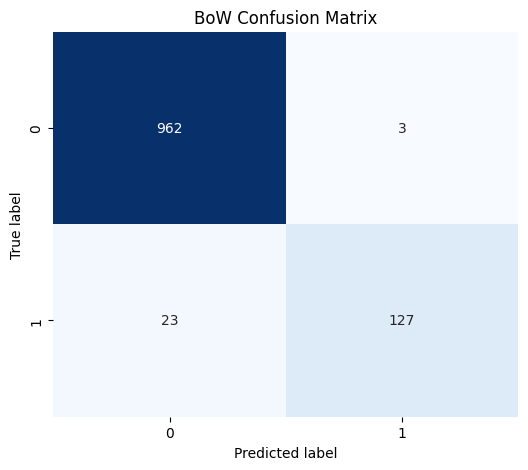

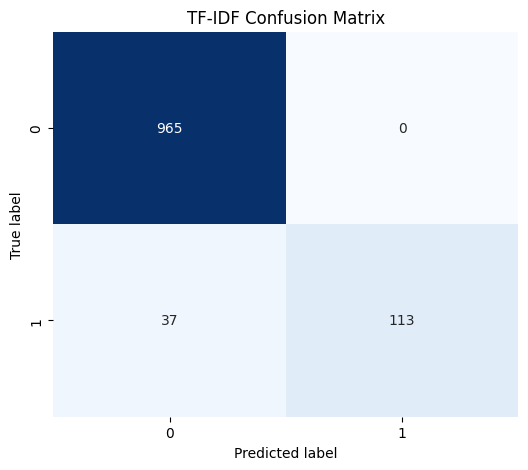

In [60]:
confusion_matrix_bow = confusion_matrix(y_test, y_pred_bow)
confusion_matrix_tfidf = confusion_matrix(y_test, y_pred_tfidf)

plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix_bow, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('BoW Confusion Matrix')

plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix_tfidf, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('TF-IDF Confusion Matrix')

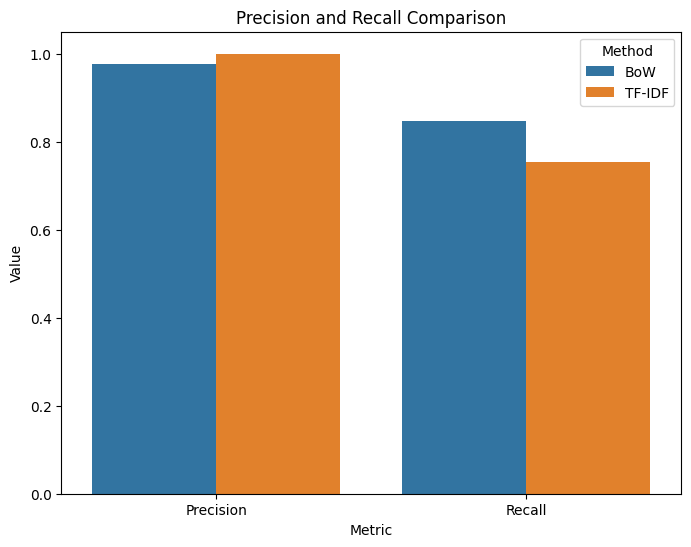

In [62]:
precision_bow = precision_score(y_test, y_pred_bow, pos_label='spam')
recall_bow = recall_score(y_test, y_pred_bow, pos_label='spam')

precision_tfidf = precision_score(y_test, y_pred_tfidf, pos_label='spam')
recall_tfidf = recall_score(y_test, y_pred_tfidf, pos_label='spam')

metrics_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall'],
    'BoW': [precision_bow, recall_bow],
    'TF-IDF': [precision_tfidf, recall_tfidf]
})

plt.figure(figsize=(8, 6))
sns.barplot(x="Metric", y="Value", hue="Method", data=metrics_df.melt(id_vars="Metric", var_name="Method", value_name="Value"))
plt.title('Precision and Recall Comparison')
plt.show()

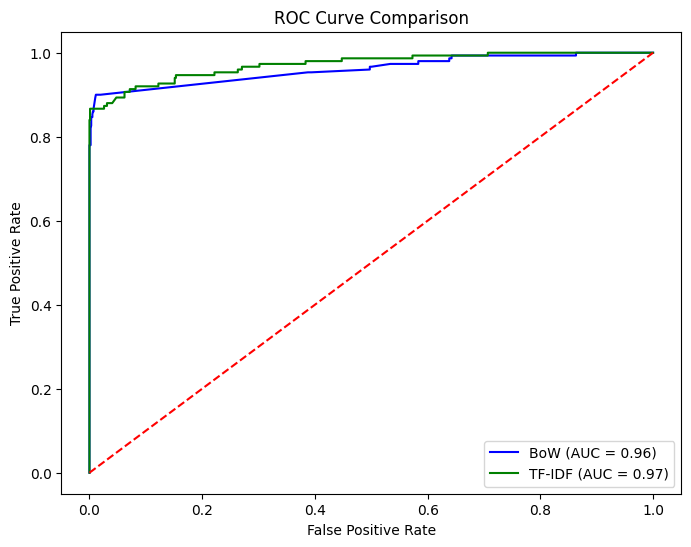

In [64]:
y_probs_bow = naive_bayes_classifier.predict_proba(X_test_bow)[:,1]
fpr_bow, tpr_bow, _ = roc_curve(y_test, y_probs_bow, pos_label='spam')
roc_auc_bow = roc_auc_score(y_test, y_probs_bow)

y_probs_tfidf = nb_classifier_tfidf.predict_proba(X_test_tfidf)[:,1]
fpr_tfidf, tpr_tfidf, _ = roc_curve(y_test, y_probs_tfidf, pos_label='spam')
roc_auc_tfidf = roc_auc_score(y_test, y_probs_tfidf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_bow, tpr_bow, label=f'BoW (AUC = {roc_auc_bow:.2f})', color='blue')
plt.plot(fpr_tfidf, tpr_tfidf, label=f'TF-IDF (AUC = {roc_auc_tfidf:.2f})', color='green')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.show()